In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(-90.000,90.000, size=1500)
lngs=np.random.uniform(-90.000,90.000,size=1500)
lats_lngs= zip(lats,lngs)
lats_lngs

In [3]:
#add the lats and lngs to a list
coordinates=list(lats_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities=[]
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique add to the list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)
        


617

In [6]:
# Import the requests library
import requests
#Import the API Key
from config import weather_api_key

In [7]:
# Starting the URL for Weather Map API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime


In [9]:
# Creat an empty list to hold the weather data
city_data=[]
#print the beginning of the logging 
print("Beginning Data Retrieval   ")
print("---------------------------")
#create counters
record_count=1
set_count=1


Beginning Data Retrieval   
---------------------------


In [10]:
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
    #Create endpoint URL with each city
    
    city_url= url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count+=1
#Run an API request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity= city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the data to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
    #Indicate the Data Loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")
    

Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | mana
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | saint-francois
Processing Record 6 of Set 1 | butembo
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | edelira
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | paamiut
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | mogadishu
Processing Record 14 of Set 1 | yenisehir
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | vestmannaeyjar
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | chimoio
Processing Record 19 of Set 1 | pombas
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | temiscaming
Processing Record 22 of Set 1 | kristiansund
Processing Record 23 of Se

Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 | saint-lo
Processing Record 43 of Set 4 | morogoro
Processing Record 44 of Set 4 | la macarena
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | nioro
Processing Record 48 of Set 4 | kamarion
Processing Record 49 of Set 4 | san lawrenz
Processing Record 50 of Set 4 | riyadh
Processing Record 1 of Set 5 | mpika
Processing Record 2 of Set 5 | barbosa ferraz
Processing Record 3 of Set 5 | placido de castro
Processing Record 4 of Set 5 | ciudad bolivar
Processing Record 5 of Set 5 | margate
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | bjala
City not found. Skipping...
Processing Record 8 of Set 5 | beaupre
Processing Record 9 of Set 5 | sao jose do egito
Processing Record 10 of Set 5 | grindavik
Processing Record 11 of Set 5 | illapel
Processing Record 12 of Set 5 | ozinki
Processing Record 13 of Set 5 | oksfjord
Processing R

Processing Record 31 of Set 8 | namibe
Processing Record 32 of Set 8 | sept-iles
Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | beira
Processing Record 35 of Set 8 | chimbote
Processing Record 36 of Set 8 | moose factory
Processing Record 37 of Set 8 | karasburg
Processing Record 38 of Set 8 | abu dhabi
Processing Record 39 of Set 8 | krasnoselkup
Processing Record 40 of Set 8 | inhambane
Processing Record 41 of Set 8 | toliary
City not found. Skipping...
Processing Record 42 of Set 8 | mugur-aksy
Processing Record 43 of Set 8 | wiarton
Processing Record 44 of Set 8 | rock sound
Processing Record 45 of Set 8 | san rafael
Processing Record 46 of Set 8 | belmonte
Processing Record 47 of Set 8 | araouane
Processing Record 48 of Set 8 | lodja
Processing Record 49 of Set 8 | tutoia
Processing Record 50 of Set 8 | gebze
Processing Record 1 of Set 9 | olinda
Processing Record 2 of Set 9 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 3 of Set 9 | pang

Processing Record 19 of Set 12 | ibia
Processing Record 20 of Set 12 | steubenville
Processing Record 21 of Set 12 | amalapuram
Processing Record 22 of Set 12 | weligama
Processing Record 23 of Set 12 | gboko
Processing Record 24 of Set 12 | staryy nadym
Processing Record 25 of Set 12 | viedma
Processing Record 26 of Set 12 | kamina
Processing Record 27 of Set 12 | inongo
Processing Record 28 of Set 12 | parfenyevo
Processing Record 29 of Set 12 | devrek
Processing Record 30 of Set 12 | ostrovskoye
Processing Record 31 of Set 12 | clarksburg
Processing Record 32 of Set 12 | clarence town
Processing Record 33 of Set 12 | codigoro
Processing Record 34 of Set 12 | minsk
Processing Record 35 of Set 12 | ampanihy
Processing Record 36 of Set 12 | sinarades
Processing Record 37 of Set 12 | taltal
Processing Record 38 of Set 12 | ginda
Processing Record 39 of Set 12 | areosa
Processing Record 40 of Set 12 | karaul
City not found. Skipping...
Processing Record 41 of Set 12 | mrirt
City not foun

In [34]:
len(city_data)

577

In [12]:
#Convert the city_data dictionary to a datafram
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,57.27,56,86,14.14,ZA,2021-10-23 16:05:32
1,Mana,5.6592,-53.7767,82.63,80,100,5.88,GF,2021-10-23 16:07:57
2,Qaanaaq,77.4840,-69.3632,-1.32,59,0,8.30,GL,2021-10-23 16:06:40
3,Saint-Francois,46.4154,3.9054,54.84,58,0,3.44,FR,2021-10-23 16:07:58
4,Butembo,0.1500,29.2833,61.56,90,95,2.55,CD,2021-10-23 16:07:58
5,Saint-Philippe,-21.3585,55.7679,76.59,82,74,11.70,RE,2021-10-23 16:06:30
6,Edelira,-26.7500,-55.2667,65.46,98,100,7.78,PY,2021-10-23 16:07:59
7,Lagoa,39.0500,-27.9833,67.28,73,7,13.87,PT,2021-10-23 16:07:59
8,Laguna,38.4210,-121.4238,58.24,90,1,1.01,US,2021-10-23 16:07:18
9,Paamiut,61.9940,-49.6678,31.89,47,15,21.56,GL,2021-10-23 16:08:00


In [13]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [14]:
#Add new column data to new and or overwrite the datatframe
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-10-23 16:05:32,-34.5322,20.0403,57.27,56,86,14.14
1,Mana,GF,2021-10-23 16:07:57,5.6592,-53.7767,82.63,80,100,5.88
2,Qaanaaq,GL,2021-10-23 16:06:40,77.4840,-69.3632,-1.32,59,0,8.30
3,Saint-Francois,FR,2021-10-23 16:07:58,46.4154,3.9054,54.84,58,0,3.44
4,Butembo,CD,2021-10-23 16:07:58,0.1500,29.2833,61.56,90,95,2.55
5,Saint-Philippe,RE,2021-10-23 16:06:30,-21.3585,55.7679,76.59,82,74,11.70
6,Edelira,PY,2021-10-23 16:07:59,-26.7500,-55.2667,65.46,98,100,7.78
7,Lagoa,PT,2021-10-23 16:07:59,39.0500,-27.9833,67.28,73,7,13.87
8,Laguna,US,2021-10-23 16:07:18,38.4210,-121.4238,58.24,90,1,1.01
9,Paamiut,GL,2021-10-23 16:08:00,61.9940,-49.6678,31.89,47,15,21.56


In [15]:
#Create the output file(CSV)
output_data_file= "weather_data/cities.csv"
#export the city_data into a CSV"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

In [17]:
#Import the time module
import time

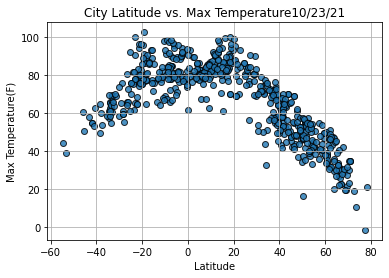

In [18]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,max_temps, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

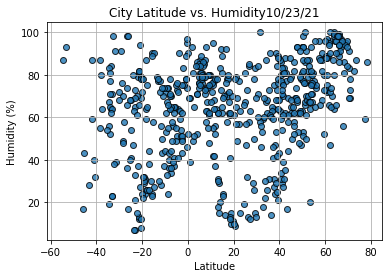

In [19]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,humidity, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

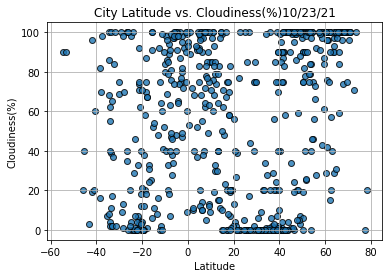

In [20]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,cloudiness, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

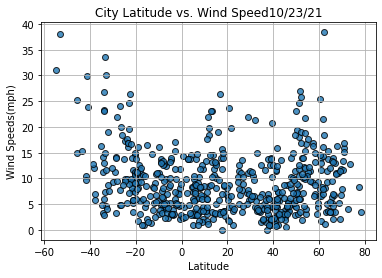

In [21]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,wind_speed, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speeds(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [22]:
#import linregress
from scipy.stats import linregress

#Create a function to createperform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
   
    #run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    #Calculate the regression line y_values
    regress_values=x_values*slope +intercept
    #Get the equation of the line
    line_eq="y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13= city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2021-10-23 16:06:38
Lat                      -37.6167
Lng                        -73.65
Max Temp                    53.89
Humidity                       64
Cloudiness                     98
Wind Speed                   5.75
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
                  

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mana,GF,2021-10-23 16:07:57,5.6592,-53.7767,82.63,80,100,5.88
2,Qaanaaq,GL,2021-10-23 16:06:40,77.4840,-69.3632,-1.32,59,0,8.30
3,Saint-Francois,FR,2021-10-23 16:07:58,46.4154,3.9054,54.84,58,0,3.44
4,Butembo,CD,2021-10-23 16:07:58,0.1500,29.2833,61.56,90,95,2.55
7,Lagoa,PT,2021-10-23 16:07:59,39.0500,-27.9833,67.28,73,7,13.87


In [25]:
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] <= 0)]

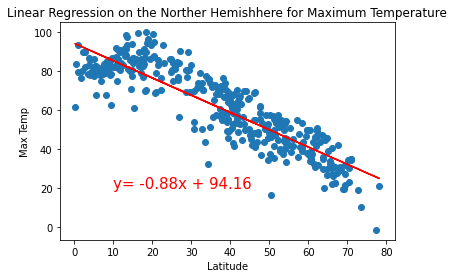

In [26]:
#Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Norther Hemishhere for Maximum Temperature','Max Temp',(10,20))

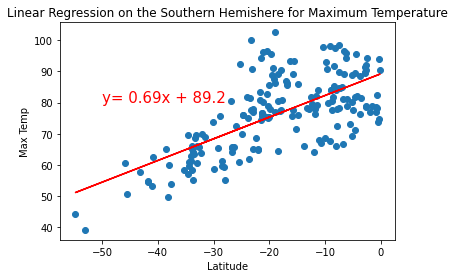

In [27]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for Maximum Temperature',"Max Temp",(-50,80))

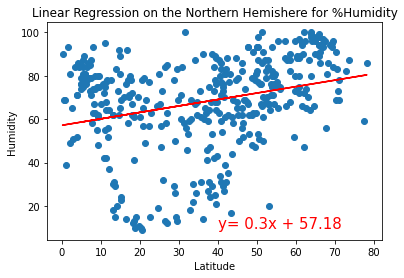

In [28]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for %Humidity',"Humidity",(40,10))

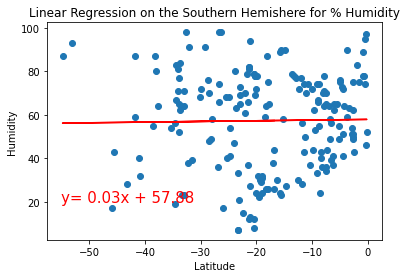

In [29]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for % Humidity',"Humidity",(-55,20))

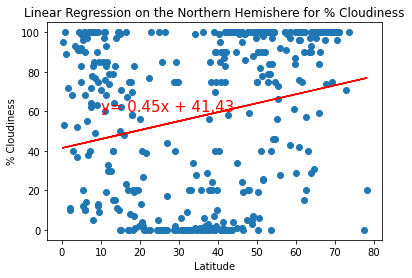

In [30]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for % Cloudiness',"% Cloudiness",(10,60))

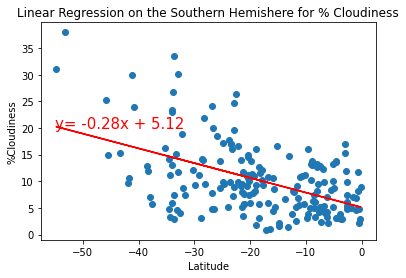

In [31]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for % Cloudiness',"%Cloudiness",(-55,20))

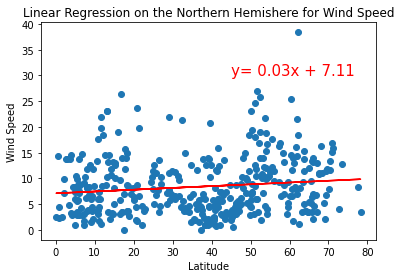

In [32]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for Wind Speed',"Wind Speed",(45,30))

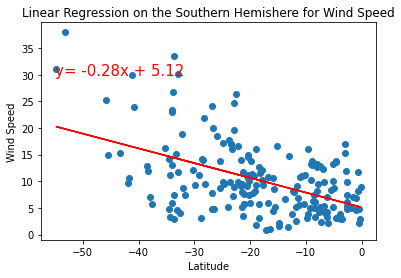

LinregressResult(slope=-0.27636978519027894, intercept=5.119490774574472, rvalue=-0.4997524300350624, pvalue=2.8522296629933563e-13, stderr=0.03512217927142952, intercept_stderr=0.7683547727866509)

In [33]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for Wind Speed',"Wind Speed",(-55,30))

linregress(x_values,y_values)